In [57]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set(rc={'figure.figsize':(13,10)})
sns.set_style("whitegrid")
sns.set_color_codes()

In [2]:
from dask.distributed import Client
import dask.bag as db
import dask.dataframe as dd
import dask

from ast import literal_eval
from collections.abc import MutableMapping
import dask.array as da
import h5py
import os

In [24]:
from geopy.geocoders import Nominatim
import reverse_geocode

In [4]:
client = Client(n_workers=4)

/Users/arpitsingh/Documents/GIT/cmpe256-team4/reviewenv/lib/python3.7/site-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 61825 instead
  http_address["port"], self.http_server.port


In [5]:
client

Client Scheduler: tcp://127.0.0.1:61826 Dashboard: http://127.0.0.1:61825/status,Cluster Workers: 4 Cores: 4 Memory: 8.59 GB


### Splitting Data into chunks

In [6]:
b = db.read_text("data/users.clean.json", blocksize="64MiB")
type(b)

dask.bag.core.Bag

### Functions to drop columns

In [7]:
def drop_cols(obj):
    print(obj.items())
    obj.pop('jobs')
#     obj.pop('currentPlace')
    obj.pop('previousPlaces')
    obj.pop('education')
    return obj
def has_cordinates(obj):
    return obj['cordinates'] is not None

In [8]:
df = b.map(eval).map(drop_cols).to_dataframe().compute()

In [9]:
df.count

<bound method DataFrame.count of                 userName                                       currentPlace  \
0                 an lam  [Thành phố Hồ Chí Minh, Việt Nam, [[], 1082309...   
1           HALİL TURGUT             [Adana, [[], 370000000, 353213330, 1]]   
2                  森田さとこ                                               None   
3              amey kore                                               None   
4       william spindler                                               None   
...                  ...                                                ...   
255415     Andrei Mustea                                               None   
255416      ahmed alalam                                               None   
255417      Brad Shaffer                                               None   
255418    Ashley Krueger                                               None   
255419       kadir çöpür                                               None   

                  

In [10]:
df

,userName,currentPlace,gPlusUserId
0,an lam,"[Thành phố Hồ Chí Minh, Việt Nam, [[], 1082309...",100000010817154263736
1,HALİL TURGUT,"[Adana, [[], 370000000, 353213330, 1]]",100000013500285534661
2,森田さとこ,None,100000021336848867366
3,amey kore,None,100000030557048145331
4,william spindler,None,100000032416892623125
...,...,...,...
255415,Andrei Mustea,None,114675878141148336835
255416,ahmed alalam,None,114675879178455853299
255417,Brad Shaffer,None,114675884186004222559
255418,Ashley Krueger,None,114675887865682990096


In [11]:
df = df.dropna()

In [12]:
df

,userName,currentPlace,gPlusUserId
0,an lam,"[Thành phố Hồ Chí Minh, Việt Nam, [[], 1082309...",100000010817154263736
1,HALİL TURGUT,"[Adana, [[], 370000000, 353213330, 1]]",100000013500285534661
5,Jacquelyn Dorris,"[Pomona, CA, [[], 340552270, -1177523050, 1]]",100000035085750632094
16,Aniello Prezioso,"[roma, [[], 418954660, 124823240, 1]]",100000067656171981860
24,Anne Mason,"[San Francisco, CA, [[], 377751960, -122419204...",100000106576186066497
...,...,...,...
255386,Mario Montenegro,"[Quilicura, [[], -333666670, -707500000, 1]]",114675765984644300828
255396,Paulo Cesar Zapata Flores,"[Lima, [[], -120478160, -770622030, 1]]",114675809533127438528
255400,Ying Chee,"[West Caldwell, [[], 408409330, -743018150, 1]]",114675818673433270985
255404,Kirk Kirkland,"[Raleigh, NC, [[], 357795900, -786381790, 1]]",114675831718698382260


In [13]:
def get_cordinates(row):
#     print("getcordinates")
    currentPlace=row["currentPlace"]
    output = None
    try:
        cordinates = currentPlace[1][1:3]
        lon = int(cordinates[1])/10000000
        lat = int(cordinates[0])/10000000
        output = (lat, lon)
    except Exception as e:
        pass
    return output

In [14]:
df['Cordinates'] = df.apply(get_cordinates, axis=1)

/Users/arpitsingh/Documents/GIT/cmpe256-team4/reviewenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df = df.dropna()

In [16]:
df

,userName,currentPlace,gPlusUserId,Cordinates
0,an lam,"[Thành phố Hồ Chí Minh, Việt Nam, [[], 1082309...",100000010817154263736,"(10.823099, 106.629664)"
1,HALİL TURGUT,"[Adana, [[], 370000000, 353213330, 1]]",100000013500285534661,"(37.0, 35.321333)"
5,Jacquelyn Dorris,"[Pomona, CA, [[], 340552270, -1177523050, 1]]",100000035085750632094,"(34.055227, -117.752305)"
16,Aniello Prezioso,"[roma, [[], 418954660, 124823240, 1]]",100000067656171981860,"(41.895466, 12.482324)"
24,Anne Mason,"[San Francisco, CA, [[], 377751960, -122419204...",100000106576186066497,"(37.775196, -122.419204)"
...,...,...,...,...
255386,Mario Montenegro,"[Quilicura, [[], -333666670, -707500000, 1]]",114675765984644300828,"(-33.366667, -70.75)"
255396,Paulo Cesar Zapata Flores,"[Lima, [[], -120478160, -770622030, 1]]",114675809533127438528,"(-12.047816, -77.062203)"
255400,Ying Chee,"[West Caldwell, [[], 408409330, -743018150, 1]]",114675818673433270985,"(40.840933, -74.301815)"
255404,Kirk Kirkland,"[Raleigh, NC, [[], 357795900, -786381790, 1]]",114675831718698382260,"(35.77959, -78.638179)"


In [17]:
df=df.drop(columns=['currentPlace'])

In [89]:
df=df.reset_index(drop=True)

In [ ]:
df

In [23]:
%%time
import reverse_geocode
cords = df['Cordinates'][0:10000]
cs = reverse_geocode.search([(35,35)])
print(cs)

[{'country_code': 'CY', 'city': 'Rizokárpaso', 'country': 'Cyprus'}]
CPU times: user 1.18 ms, sys: 177 µs, total: 1.36 ms
Wall time: 1.33 ms


In [41]:

def get_country(row):
    cordinates = row['Cordinates']
    country = None
    if cordinates:
        try:
            raw_location = reverse_geocode.search([cordinates])
            country = raw_location[0].get('country')
        except Exception as e:
            pass
    return country

In [38]:
%%time
df['Country'] = df.apply(get_country, axis=1)

CPU times: user 1min 29s, sys: 3.17 s, total: 1min 32s
Wall time: 1min 38s


In [39]:
df

,userName,gPlusUserId,Cordinates,Country
0,an lam,100000010817154263736,"(10.823099, 106.629664)",Vietnam
1,HALİL TURGUT,100000013500285534661,"(37.0, 35.321333)",Turkey
2,Jacquelyn Dorris,100000035085750632094,"(34.055227, -117.752305)",United States
3,Aniello Prezioso,100000067656171981860,"(41.895466, 12.482324)",Holy See (Vatican City State)
4,Anne Mason,100000106576186066497,"(37.775196, -122.419204)",United States
...,...,...,...,...
737634,Mario Montenegro,114675765984644300828,"(-33.366667, -70.75)",Chile
737635,Paulo Cesar Zapata Flores,114675809533127438528,"(-12.047816, -77.062203)",Peru
737636,Ying Chee,114675818673433270985,"(40.840933, -74.301815)",United States
737637,Kirk Kirkland,114675831718698382260,"(35.77959, -78.638179)",United States


In [44]:
temp_df = df

In [45]:
temp_df['latitude'] = temp_df['Cordinates'].apply(lambda x : x[0])
# temp_df['longitude']

In [47]:
temp_df['longitude'] = temp_df['Cordinates'].apply(lambda x : x[1])



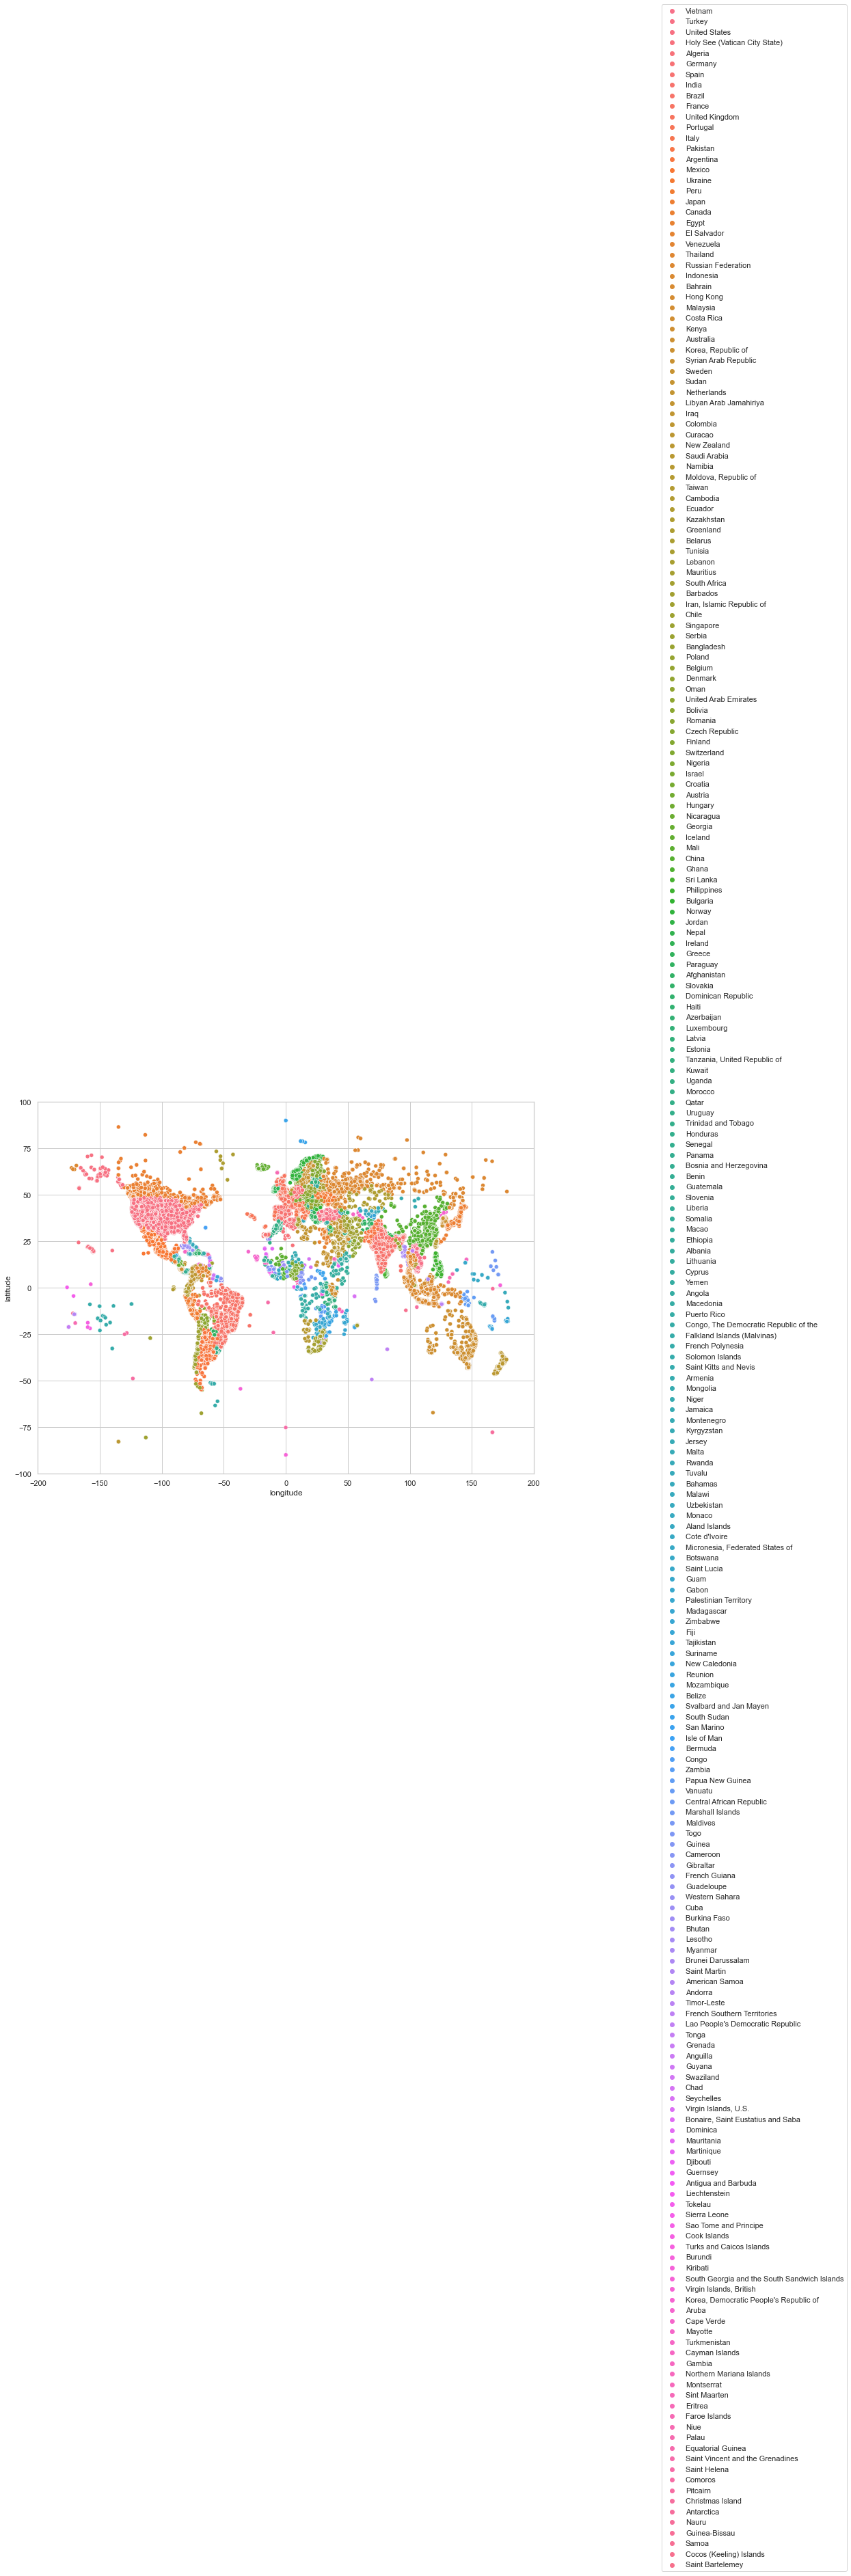

In [58]:
ax = sns.scatterplot(data=temp_df, x='longitude', y='latitude',hue='Country')
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlim(-200,200)
ax.set_ylim(-100,100)
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [72]:
country_list=temp_df['Country'].unique()

In [51]:
len(country_list)

243

In [80]:
user_count_group = temp_df.groupby('Country', as_index=False).count()

In [76]:
user_count_data

,userName,gPlusUserId,Cordinates,latitude,longitude
Country,,,,,
United States,340400,340400,340400,340400,340400
India,52230,52230,52230,52230,52230
United Kingdom,30856,30856,30856,30856,30856
Canada,24440,24440,24440,24440,24440
Brazil,22614,22614,22614,22614,22614
...,...,...,...,...,...
Samoa,1,1,1,1,1
Nauru,1,1,1,1,1
Cocos (Keeling) Islands,1,1,1,1,1


In [75]:
user_count_data = user_count_group.sort_values(['userName'], ascending=False)

KeyError: 'userName'

In [85]:
user_count_data = user_count_data.reset_index()

In [86]:
user_count_data

,Country,userName,gPlusUserId,Cordinates,latitude,longitude
0,United States,340400,340400,340400,340400,340400
1,India,52230,52230,52230,52230,52230
2,United Kingdom,30856,30856,30856,30856,30856
3,Canada,24440,24440,24440,24440,24440
4,Brazil,22614,22614,22614,22614,22614
...,...,...,...,...,...,...
238,Samoa,1,1,1,1,1
239,Nauru,1,1,1,1,1
240,Cocos (Keeling) Islands,1,1,1,1,1
241,Guinea-Bissau,1,1,1,1,1


<AxesSubplot:xlabel='userName', ylabel='Country'>

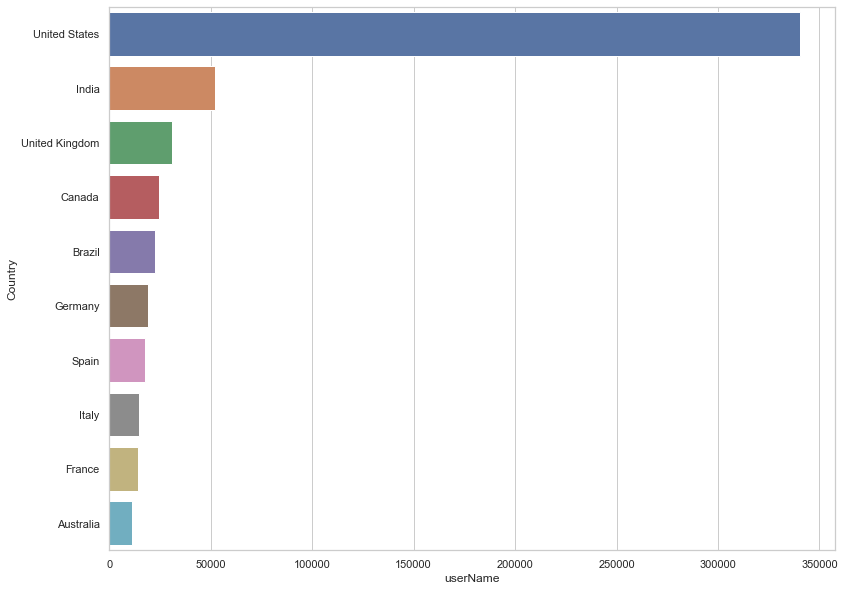

In [88]:
sns.barplot(y='Country', x='userName', data=user_count_data[0:10])